# Linear Regression USA Housing Price Prediction

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('USA_Housing.csv')
df = dataset.copy()

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.drop(labels= 'Address',inplace=True,axis=1)

In [5]:
df.columns = ['avg_income', 
             'avg_age', 
             'avg_rooms', 
             'avg_bedrooms', 
             'population', 'price']

In [7]:
df.head()

,avg_income,avg_age,avg_rooms,avg_bedrooms,population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [13]:
X = df[['avg_income', 
             'avg_age', 
             'avg_rooms', 
             'avg_bedrooms', 
             'population']]
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Intercept: ', regressor.intercept_)

#y = kx+b ----> k:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Intercept:  -2646630.5310569536


,Coefficient
avg_income,21.660408
avg_age,165809.651149
avg_rooms,120329.407877
avg_bedrooms,2193.095579
population,15.285885


In [24]:
y_pred=regressor.predict(X_test)

In [28]:
Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
Comparison

,Actual,Predicted
398,8.942511e+05,9.713052e+05
3833,9.329794e+05,9.547172e+05
4836,9.207479e+05,9.075616e+05
4572,6.918549e+05,4.932514e+05
636,7.327332e+05,7.178465e+05
...,...,...
4228,7.549606e+05,8.391244e+05
2367,1.205568e+06,1.142525e+06
788,6.682555e+05,4.986132e+05
1452,1.398760e+06,1.235228e+06


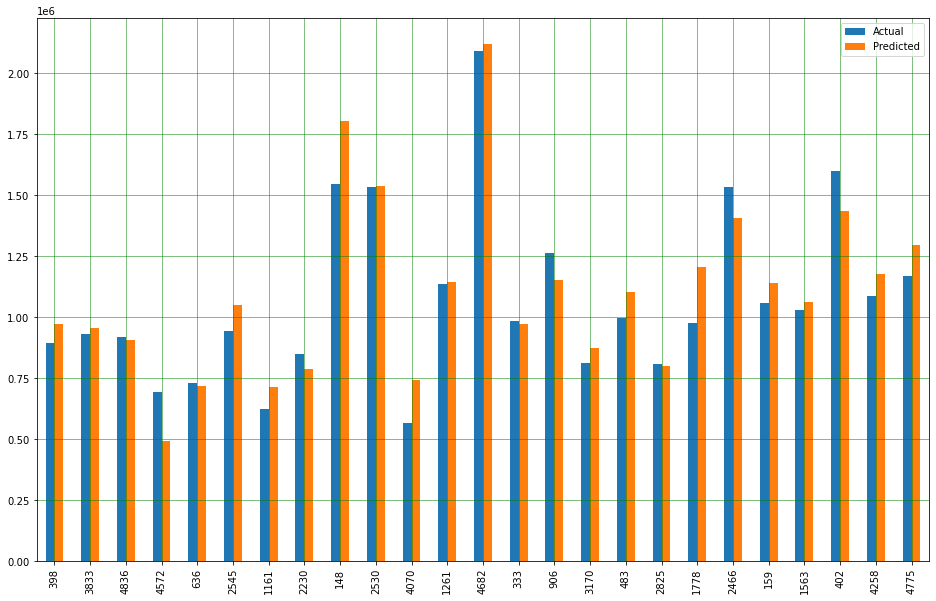

In [29]:
compared = Comparison.head(25)
compared.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [111]:
R2 = metrics.r2_score(y_test, y_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9146454505137886
Adjusted R^2 : 0.9142161016733148
Mean Absolute Error: 82657.94605892818
Mean Squared Error: 10549721686.161531
Root Mean Squared Error: 102711.83810136751
